<a href="https://colab.research.google.com/github/Mrthuancao/CS114.M21.KHCL.N05/blob/main/VGG16_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

#**Thư viện**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import csv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Chuẩn bị data**

In [ ]:
Train_dir = '/content/drive/MyDrive/Máy_học_CS114/Data/Data_raw'

In [ ]:
CATEGORIES = ['CamDT', 'CanMongTay','ChamTayLenMat','ChongCam1Tay','ChongCam2Tay','NgoiGacChan','NgoiGu','NgoiThang','NguNguaRaSau','NguUpMat','VoDau','VuonVai']
epochs=50
batch_size = 32
IMG_SIZE = 224

In [ ]:
# idg = ImageDataGenerator(preprocessing_function = preprocess_input,validation_split=0.2)

In [ ]:
# train_generator = idg.flow_from_directory('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Data]/[Data_raw]',batch_size=(20),target_size=(224,224),subset="training")
# val_generator = idg.flow_from_directory('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Data]/[Data_raw]',batch_size=(20),target_size=(224,224),subset="validation")

In [ ]:
train_ds = utils.image_dataset_from_directory(
    Train_dir,
    validation_split=0.2,
    subset="training",
    seed=47,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size
)

val_ds = utils.image_dataset_from_directory(
    Train_dir,
    validation_split=0.2,
    subset="validation",
    seed=47,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size
)

Found 9181 files belonging to 12 classes.
Using 7345 files for training.
Found 9181 files belonging to 12 classes.
Using 1836 files for validation.


#**Load model VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
model = VGG16(input_shape=IMG_SHAPE,
              include_top=False,
              weights='imagenet')
model.trainable = False

model.summary()
#bỏ 3 lớp full connected cuối

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
#Thêm các lớp cuối thay cho 3 lớp đã bỏ
model_final = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMG_SHAPE),

    layers.Rescaling(1./255),

    model,
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12)
])


In [ ]:
model_final.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
model_earlyStopping = tf.keras.callbacks.EarlyStopping(
    min_delta=1e-3,
    patience=6,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
%cd /content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]

/content/drive/.shortcut-targets-by-id/1fYE__4j73SJFB2gWgW2nQ-jH9LWvNF_W/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]


In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/cp.ckpt',
    save_weights_only=True,
    verbose = 1
)

#**Train**

In [ ]:
history = model_final.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        shuffle=True,
        callbacks = [model_earlyStopping, model_checkpoint]
  )

Epoch 1/50
230/230 [==============================] - ETA: 0s - loss: 1.4981 - accuracy: 0.5830
Epoch 1: saving model to /content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/cp.ckpt
230/230 [==============================] - 2818s 12s/step - loss: 1.4981 - accuracy: 0.5830 - val_loss: 0.4238 - val_accuracy: 0.8671
Epoch 2/50
230/230 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.8116
Epoch 2: saving model to /content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/cp.ckpt
230/230 [==============================] - 51s 218ms/step - loss: 0.5580 - accuracy: 0.8116 - val_loss: 0.2249 - val_accuracy: 0.9363
Epoch 3/50
230/230 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.8369
Epoch 3: saving model to /content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/cp.ckpt
230/230 [==============================] - 52s 220ms/step - loss: 0.4665 - accuracy: 0.8369 - val_loss: 0.1569 - val_accuracy: 0.

In [ ]:
os.listdir('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]')

['cp.ckpt.data-00000-of-00001', 'cp.ckpt.index', 'checkpoint']

In [ ]:
#Lưu model
#!mkdir -p saved_model
model_final.save('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]')
#model_final.save('/content/drive/MyDrive/Máy_học_CS114/[Final]/[SaveModel]')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/assets


In [ ]:
#Lưu model
model_final.save_weights('/content/drive/MyDrive/Máy_học_CS114/[Final]')

In [ ]:
#Lưu theo file H5
model_final.save('/content/drive/MyDrive/Máy_học_CS114/[Final]/my_model.h5')

#**Tiếp tục train(nếu cần)**

In [ ]:
/content/drive/MyDrive/Máy_học_CS114/[Final]/my_model.h5

In [ ]:
#tiếp tục train nếu GPU bị ngưng
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle


In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
model = VGG16(input_shape=IMG_SHAPE,
              include_top=False,
              weights='imagenet')
model.trainable = False

model.summary()
#bỏ 3 lớp full connected cuối

In [ ]:
#Thêm các lớp cuối thay cho 3 lớp đã bỏ
model_new = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMG_SHAPE),

    layers.Rescaling(1./255),

    model,
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12)
])


In [ ]:
checkpoint_path = '/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]/cp.ckpt'

In [ ]:
model_new.load_weights('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]')

NotFoundError: ignored

In [ ]:
model_new.load_weights(checkpoint_path)

NotFoundError: ignored

In [ ]:
model_earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-5,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Máy_học_CS114/[Final]/[Model_checkpoint_VGG16]',
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=False,
    save_freq=3
)

In [ ]:
history = model_continue.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        shuffle=True,
        callbacks = [model_earlyStopping, model_checkpoint]
  )

#**Test**

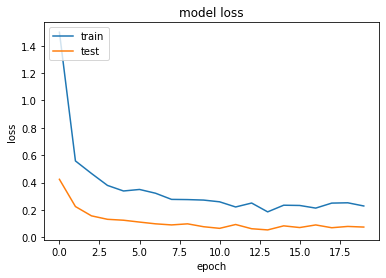

In [ ]:
# Plot of validation loss and loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

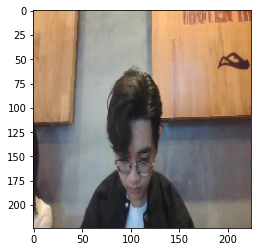

In [ ]:
from keras.preprocessing import image
temp = "/content/drive/MyDrive/Máy_học_CS114/Data/Data_raw/NgoiGu/WIN_20220525_17_59_02_Pro (1).jpg"
img = image.load_img(temp,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
print(img.shape)

(1, 224, 224, 3)


In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Máy_học_CS114/[Final]/my_model.h5")

In [ ]:
out = model_final.predict(img)
preds = np.argmax(out, axis=1)
print(preds)
for pred in preds:
  if pred  == 0:
    print("CamDT")
  elif pred == 1:
    print("CanMongTay")
  elif pred == 2:
    print("ChamTayLenMat")
  elif pred == 3:
    print("ChongCam1Tay")
  elif pred == 4:
    print("ChongCam2Tay")
  elif pred == 5:
    print("NgoiGacChan")
  elif pred == 6:
    print("NgoiGu")
  elif pred == 7:
    print("NgoiThang")
  elif pred == 8:
    print("NguNguaRaSau")
  elif pred == 9:
    print("NguUpMat")
  elif pred == 10:
    print("VoDau")
  elif pred == 11:
    print("VuonVai")
  
  


[6]
NgoiGu


#**Test bằng tập Datatest**

**Lưu path và label ảnh**

In [ ]:
import pandas as pd
import csv
import glob2
import os
import numpy as np

In [ ]:
path = ['/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/CamDT',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/CanMongTay',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/ChamTayLenMat',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/ChongCam1Tay',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/ChongCam2Tay',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/NgoiGacChan',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/NgoiGu',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/NgoiThang',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/NguNguaRaSau',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/NguUpMat',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/VoDau',
 '/content/drive/MyDrive/Máy_học_CS114/Data/Data_Test/VuonVai']
print(len(path))

12


In [ ]:
df = []   

In [ ]:
for i in range(len(path)):
  files = []
  for ext in ["*.png", "*.jpeg", "*.jpg"]:
    image_files = glob2.glob(os.path.join(path[i], ext))
    files += image_files


  for j in range(len(files)):
    img = image.load_img(files[j],target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    out = model_final.predict(img)
    pred = np.argmax(out, axis=1)
    df_features = pd.DataFrame(
          {
              'Path' : [files[j]],
              'Label': pred
          })
    df.append(df_features)
   


In [ ]:
dfcon = pd.concat([i for i in df])
dfcon

,Path,Label
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
...,...,...
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,11
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,2
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,11


In [ ]:
dfcon.to_csv('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Test_VGG16]/predictLabel.csv', index=False)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Test_VGG16]/testLabel.csv')
test

,Path,Label
0,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,0
1,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,0
2,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,0
3,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,0
4,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,0
...,...,...
1217,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,11
1218,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,11
1219,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,11
1220,/content/drive/MyDrive/Colab Notebooks/Máy_ho...,11


In [ ]:
predict = pd.read_csv('/content/drive/MyDrive/Máy_học_CS114/[Final]/[Test_VGG16]/predictLabel.csv')
predict

,Path,Label
0,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
1,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
2,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
3,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
4,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,0
...,...,...
1217,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,11
1218,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,2
1219,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,7
1220,/content/drive/MyDrive/Máy_học_CS114/Data/Da...,11


In [ ]:
list_test = [f for f in test['Label']]
list_pred = [f for f in predict['Label']]
print(len(list_test))
print(len(list_pred))

1222
1222


In [ ]:
acc_total = 0
acc_class = [0,0,0,0,0,0,0,0,0,0,0,0]
count = [0,0,0,0,0,0,0,0,0,0,0,0]
names = ['CamDT',
 'CanMongTay',
 'ChamTayLenMat',
 'ChongCam1Tay',
 'ChongCam2Tay',
 'NgoiGacChan',
 'NgoiGu',
 'NgoiThang',
 'NguNguaRaSau',
 'NguUpMat',
 'VoDau',
 'VuonVai']
for t,p in zip(list_test, list_pred):
  if t == p:
    acc_total+=1
  if t == 0:
    if t == p:
      acc_class[0]+=1
    count[0]+=1
  elif t == 1:
    if t == p:
      acc_class[1]+=1
    count[1]+=1
  if t == 2:
    if t == p:
      acc_class[2]+=1
    count[2]+=1
  if t == 3:
    if t == p:
      acc_class[3]+=1
    count[3]+=1
  if t == 4:
    if t == p:
      acc_class[4]+=1
    count[4]+=1
  if t == 5:
    if t == p:
      acc_class[5]+=1
    count[5]+=1
  if t == 6:
    if t == p:
      acc_class[6]+=1
    count[6]+=1
  if t == 7:
    if t == p:
      acc_class[7]+=1
    count[7]+=1
  if t == 8:
    if t == p:
      acc_class[8]+=1
    count[8]+=1
  if t == 9:
    if t == p:
      acc_class[9]+=1
    count[9]+=1
  if t == 10:
    if t == p:
      acc_class[10]+=1
    count[10]+=1
  if t == 11:
    if t == p:
      acc_class[11]+=1
    count[11]+=1
print(f'acc_total: {acc_total}/1222 = ' + "{:.2f}".format(acc_total/1222))

for n, i, j in zip(names, acc_class,count):
  print(f'{n}: {i}/{j} = '+ "{:.2f}".format(i/j))

acc_total: 489/1222 = 0.40
CamDT: 75/97 = 0.77
CanMongTay: 0/104 = 0.00
ChamTayLenMat: 21/110 = 0.19
ChongCam1Tay: 0/110 = 0.00
ChongCam2Tay: 34/102 = 0.33
NgoiGacChan: 69/101 = 0.68
NgoiGu: 34/105 = 0.32
NgoiThang: 52/98 = 0.53
NguNguaRaSau: 57/101 = 0.56
NguUpMat: 62/95 = 0.65
VoDau: 26/96 = 0.27
VuonVai: 59/103 = 0.57


In [ ]:
f = open("/content/drive/MyDrive/Máy_học_CS114/[Final]/my_model.h5",mode = 'r+b')
c = f.read()
print(c)
